# After Class 10/08 

## Puntos interesantes de la clase de ayer que vamos a repasar:

- Machine learning no es algo nuevo

- [No Machine learning, KPIS First.](https://medium.com/mercadolibre-tech/no-machine-learning-kpis-first-935e8ca0e4a9)

- Importancia de la calidad del dato (GI-GO) __*Garbage In, Garbage Out*__

- Aplicaciones de Machine Learning en el mundo real

- Aprendizaje Supervisado. Ejemplo practico regresion Lineal

## Arranquemos!

### Machine Learning no es algo nuevo...

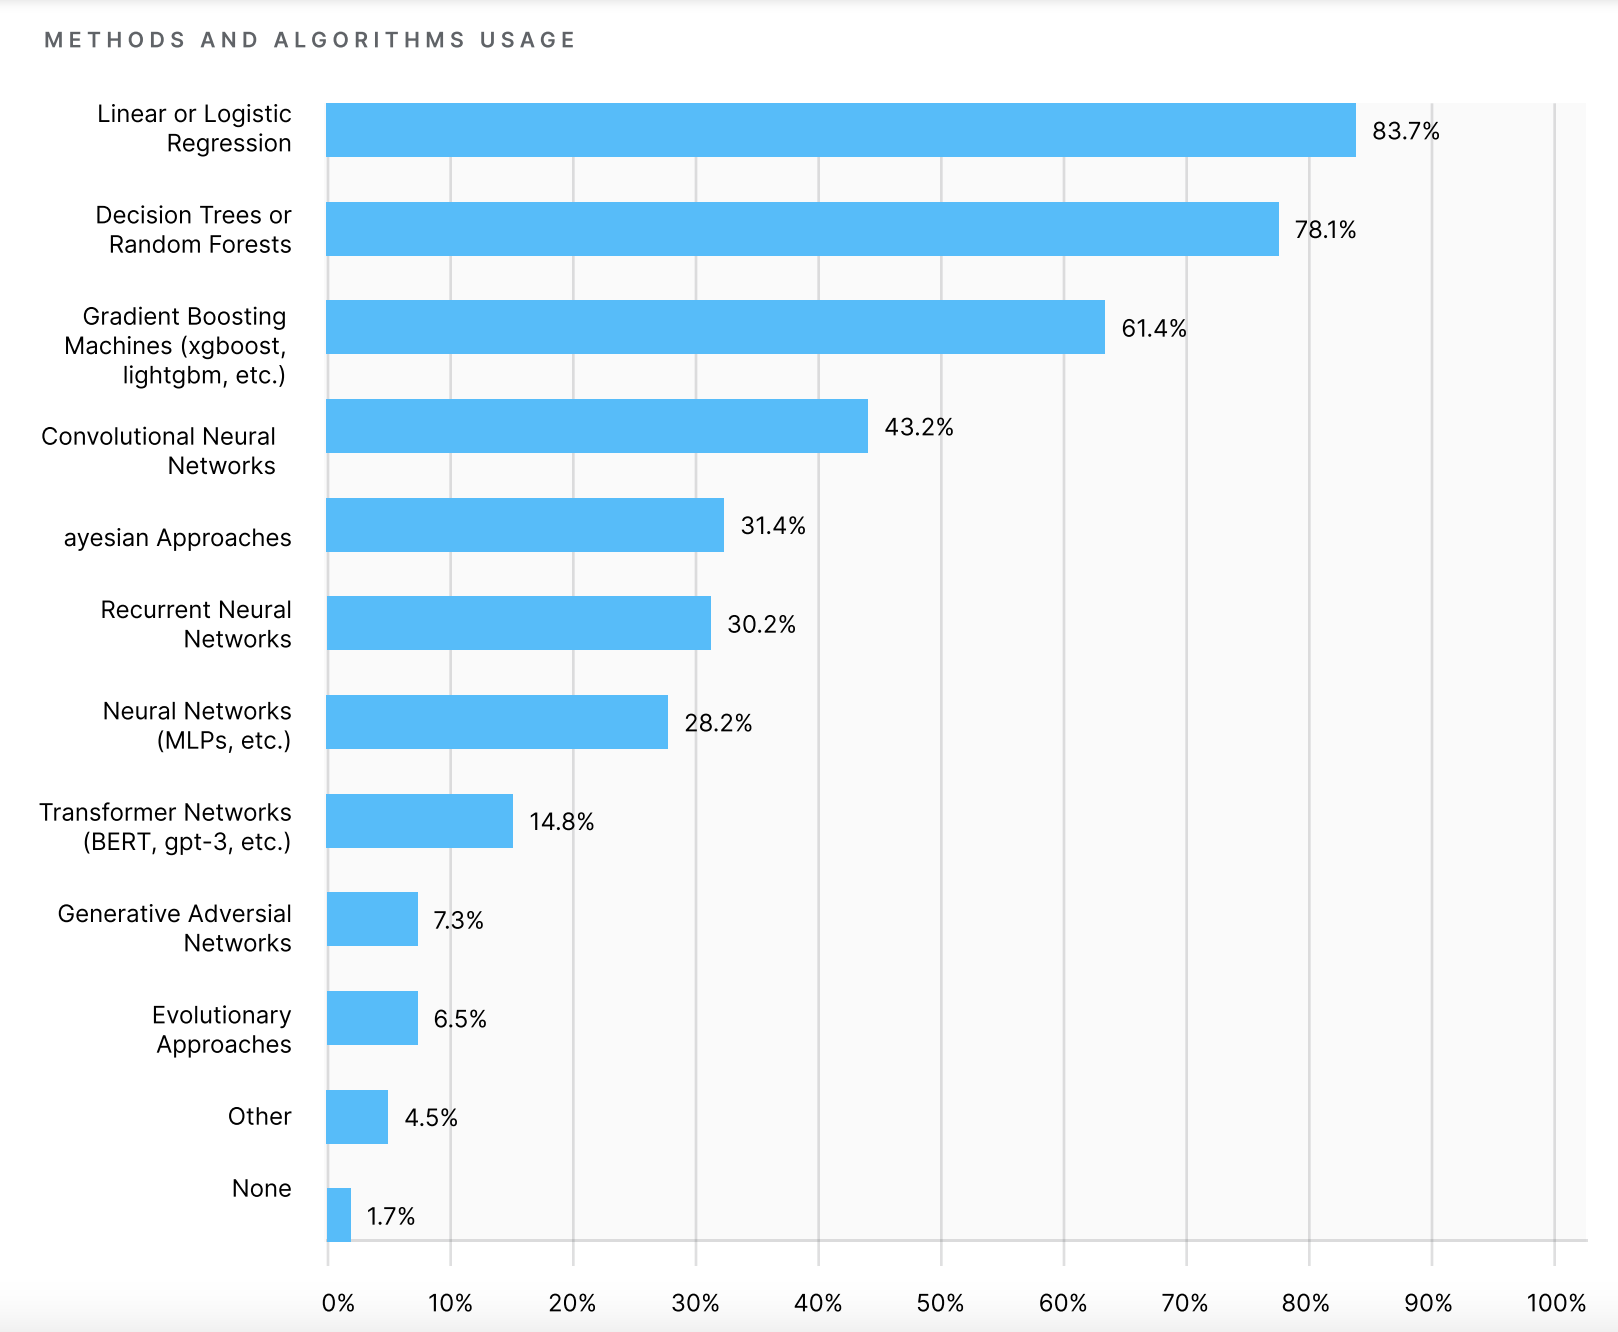

__*[Kaggle 2020 Survey](https://www.kaggle.com/kaggle-survey-2020)*__

Si observamos el grafico anterior notamos que el top 1 lo llevan las regresiones logisticas y lineales ideadas en 1800...

## No machine learning, KPIs First.

Siempre antes de querer atacar cualquier problema de machine learning tenemos que tomarnos el tiempo de buscar un objetivo que nos guste cumplir y por consecuente para saber poder entender si estamos cumpliendo ese objetivo tenemos que usar KPIs o metricas para medirlo.

### Ejemplo Medium Meli
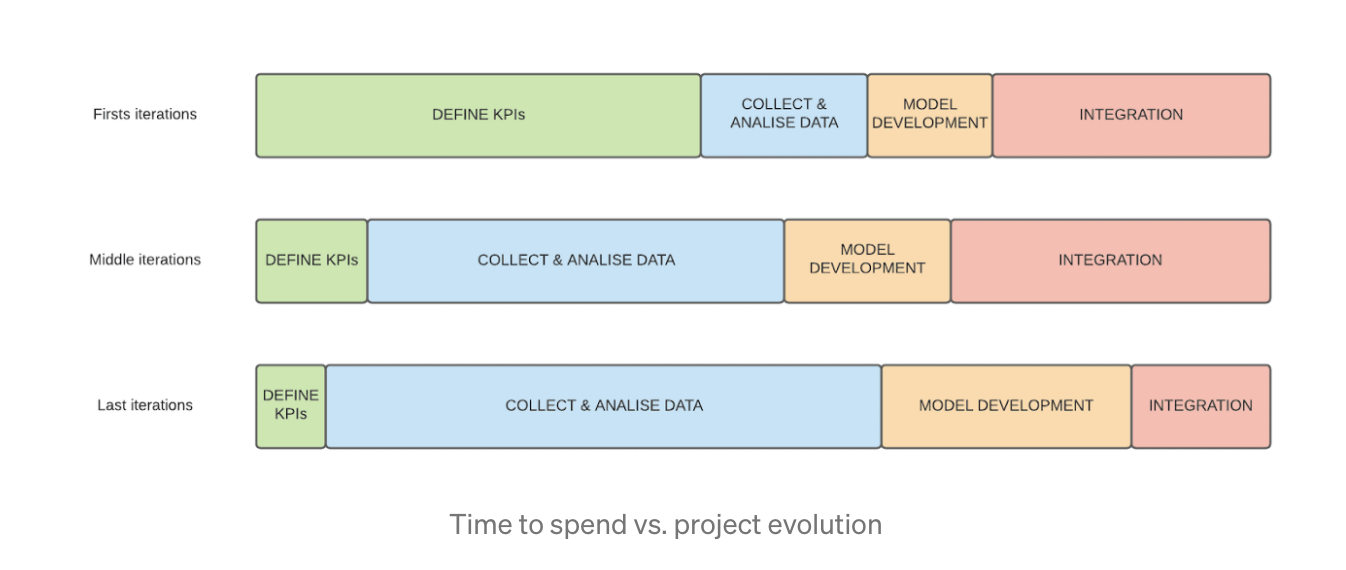

__*Observen el tiempo que le dedican en las primeras iteraciones del modelo a definir KPIs que ayuden a medir el objetivo del proyecto*__

## Importancia de la calidad del dato

### Analogia Pizzero

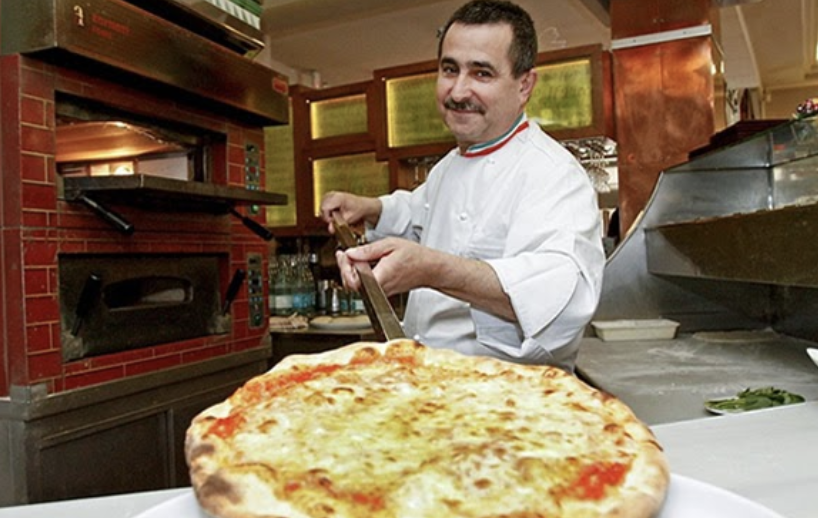


__*Por mas que tengamos el mejor algoritmo para el problema (Horno) y al mejor Data Scientist (Pizzero) si nuestra harina, levadura, tomate etc es de mala calidad (Datos) es muy probable que la pizza (Prediccion) sea mala*__

Por si quieren profundizar sobre este tema: [Data Quality in the era of A.I.](https://www.freecodecamp.org/news/data-quality-in-the-era-of-a-i-d8e398a91bef/)


## Ejemplo Aviones de Guerra Segunda Guerra Mundial

Durante la segunda guerra mundial se le encargo a un grupo de estadistas la tarea de identificar que partes del avion deberian ser reforzadas para tener menos bajas. Para resolver dicha tarea se les mostro el siguiente diagrama de daños de los aviones __sobrevivientes...__

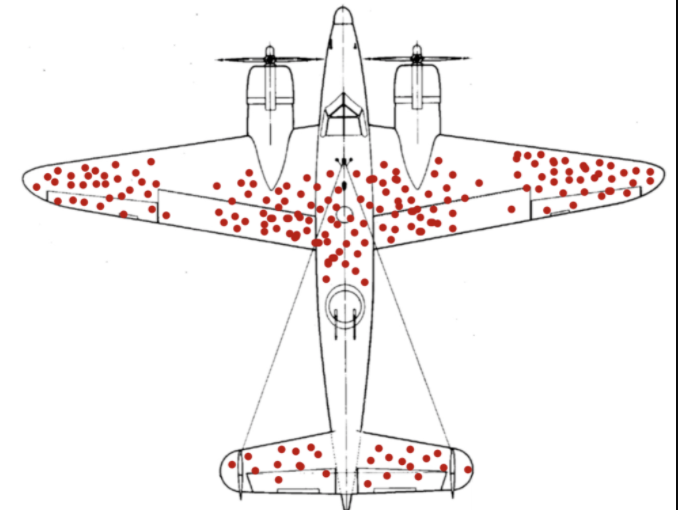

Pero hubo un hombre del grupo de estadisticos que estaba en total desacuerdo con el plan, Abraham Wald. 

Abraham noto un error logico comunmente llamado __*Survival Bias*__, el mismo denota que estaban observando solamente aviones que habian sobrevivido a los ataques por lo tanto el daño que habian recibido no era critico.

Este breve ejemplo la importancia del sesgo y tambien la importancia de revisar  de nuestros datos no solo la integridad y la calidad si no tambien el origen de los mismos. Los datos no son los culpables de que estemos realizando malas predicciones, el culpable somos nosotros que estamos utilizando solo una parte de ellos __*(Garbage In - Garbage Out)*__

## Aplicaciones de Machine Learning en el mundo real

Algunas aplicaciones de machine learning para charlar:

- Segmentacion de Clientes:

- Recomendacion de Productos (Next Best Product):

- Prediccion de Demanda:

- Deteccion de Fraude de Tarjeta de Credito:

- Deteccion de correo Spam:


    

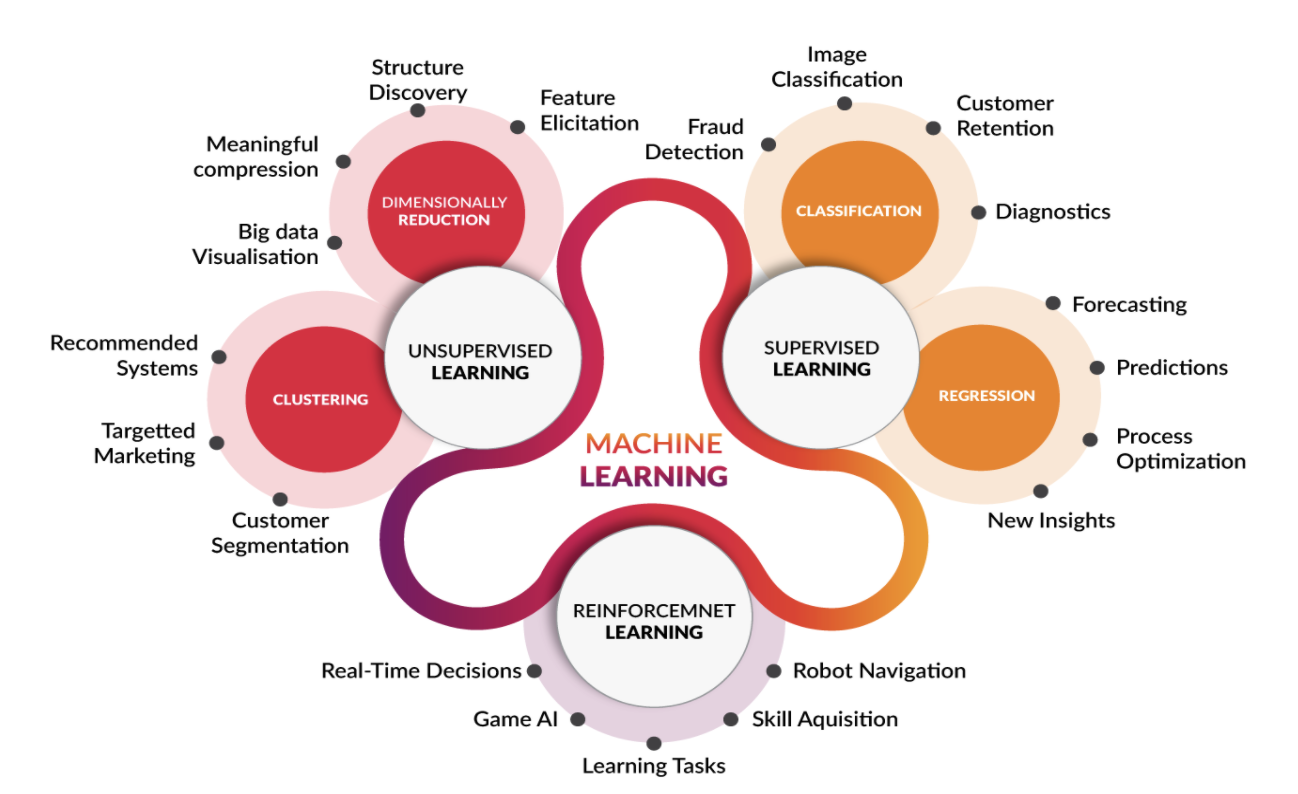

__*[Practical Machine Learning Problems by James Brown](https://machinelearningmastery.com/practical-machine-learning-problems/)*__

# Bueno basta de aburrirlos con teoria vamos a codear un poco...

## Analisis Mercado Inmobiliario BA

El dataset que vamos a estar utilizando es de [Properati](https://www.properati.com.ar/) y contiene las propiedades en venta en la Ciudad Autonoma de Buenos Aires.

### Columnas:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


In [1]:
## Importamos Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../data/datos_properati.csv')

In [4]:
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0


In [5]:
df.shape

(18979, 17)

## Vamos a analizar un poco que tiene el dataframe

In [7]:
df['property_type'].value_counts(normalize=True)

apartment    0.780178
house        0.085252
PH           0.077085
store        0.057485
Name: property_type, dtype: float64

In [8]:
df.isna().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1534
surface_total_in_m2         2393
surface_covered_in_m2       2103
price_usd_per_m2            2942
floor                      16223
rooms                       5462
expenses                   15164
properati_url                  0
barrio                         0
comuna                         0
dtype: int64


**Encuentran alguna columna para salvar algunos nulos?**

**Hay bastantes nulos en la superficie total del depto, Alguna idea para rellenar estos nulos?**

Algunas que se me ocurren a mi:

- Utilizar el precio por m2 y el precio total

- Buscar el ratio de cuanto representa el % de superficie cubierta y utilizar el promedio



In [14]:
df.loc[df.price_aprox_usd.isna()].price_usd_per_m2.isna().sum()

1534

In [15]:
df.dropna(how='any',subset=['price_aprox_usd'], inplace=True)

In [16]:
df.isna().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2         1395
surface_covered_in_m2       1123
price_usd_per_m2            1408
floor                      14790
rooms                       4342
expenses                   13711
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

## Ahora hablando de calidad de datos no les parece que deberiamos chequear algunas cosas para ver la integridad?

Por ejemplo una casa puede tener mas superficie cubierta que total?

In [17]:
df.loc[df.surface_covered_in_m2 > df.surface_total_in_m2]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
106,2017-09-07,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.566867,-58.444197",-34.566867,-58.444197,1650000.0,455.0,456.0,3626.373626,NaN,5.0,NaN,https://www.properati.com.ar/1ehbq_venta_casa_...,PALERMO,14.0
153,2017-09-12,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5830704,-58.4241896",-34.583070,-58.424190,140000.0,39.0,44.0,3589.743590,NaN,1.0,NaN,https://www.properati.com.ar/1en9l_venta_depar...,PALERMO,14.0
657,2017-10-17,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5827102814,-58.4268853069",-34.582710,-58.426885,307300.0,59.0,63.0,5208.474576,NaN,NaN,NaN,https://www.properati.com.ar/1gyrq_venta_depar...,PALERMO,14.0
935,2017-11-06,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5869532,-58.4189032",-34.586953,-58.418903,275000.0,13.0,79.0,21153.846154,1.0,4.0,NaN,https://www.properati.com.ar/1htrv_venta_depar...,PALERMO,14.0
1174,2017-11-22,sell,house,|Argentina|Capital Federal|Palermo|,"-34.583652,-58.444111",-34.583652,-58.444111,930000.0,205.0,343.0,4536.585366,NaN,5.0,NaN,https://www.properati.com.ar/1ibt5_venta_casa_...,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,2017-08-30,sell,house,|Argentina|Capital Federal|Villa Real|,"-34.62001,-58.522279",-34.620010,-58.522279,299000.0,100.0,180.0,2990.000000,NaN,6.0,NaN,https://www.properati.com.ar/1e2z7_venta_casa_...,VILLA REAL,10.0
18068,2017-09-15,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.576278172,-58.4678560311",-34.576278,-58.467856,470000.0,108.0,205.0,4351.851852,NaN,NaN,NaN,https://www.properati.com.ar/1euq9_venta_casa_...,VILLA ORTUZAR,15.0
18153,2017-12-17,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.574536,-58.470279",-34.574536,-58.470279,1340000.0,541.0,650.0,2476.894640,NaN,11.0,NaN,https://www.properati.com.ar/1j210_venta_casa_...,VILLA ORTUZAR,15.0
18694,2017-10-07,sell,apartment,|Argentina|Capital Federal|Coghlan|,"-34.5637396,-58.4757468",-34.563740,-58.475747,85000.0,40.0,46.0,2125.000000,NaN,2.0,NaN,https://www.properati.com.ar/1g07v_venta_depar...,COGHLAN,12.0


Estos registros quitan credebilidad al dataset, algo que puede estar pasando es que estan dados vuelta. Probemos cambiarlos de lugar si la condicion se da.

In [21]:
df.loc[df.surface_covered_in_m2 > df.surface_total_in_m2]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna


In [19]:
wrong_surface_rows = df.loc[df.surface_covered_in_m2 > df.surface_total_in_m2]

df.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

In [20]:
df.loc[df.surface_covered_in_m2 > df.surface_total_in_m2]

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna


In [23]:
df.surface_total_in_m2.describe()

count     16050.000000
mean        143.213022
std        1769.889621
min           0.000000
25%          48.000000
50%          75.000000
75%         132.000000
max      184000.000000
Name: surface_total_in_m2, dtype: float64

## Veamos Barrios con mas casas

In [34]:

total_propiedades = df.groupby(['barrio'])['property_type'].count().values ## Lista con propiedades por barrio

porcentaje_casas = df.loc[df.property_type.isin(['PH','house'])].groupby(['barrio'])['property_type'].count()/ total_propiedades
porcentaje_casas.sort_values(ascending=False, inplace=True)

In [37]:
porcentaje_casas.tail(5)

barrio
MONSERRAT        0.055851
SAN NICOLAS      0.034646
RETIRO           0.025135
RECOLETA         0.024564
PUERTO MADERO    0.006270
Name: property_type, dtype: float64

[Text(0, 0, 'VILLA RIACHUELO'),
 Text(1, 0, 'VERSALLES'),
 Text(2, 0, 'MATADEROS'),
 Text(3, 0, 'PARQUE AVELLANEDA'),
 Text(4, 0, 'VILLA REAL'),
 Text(5, 0, 'VILLA LUGANO'),
 Text(6, 0, 'VILLA DEVOTO'),
 Text(7, 0, 'MONTE CASTRO'),
 Text(8, 0, 'NUEVA POMPEYA'),
 Text(9, 0, 'VELEZ SARSFIELD')]

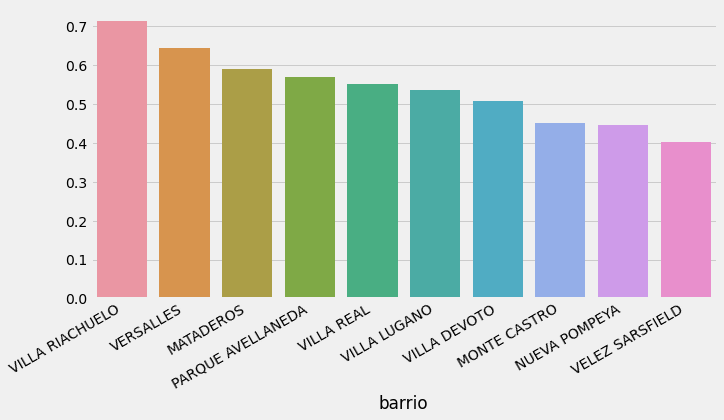

In [45]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=porcentaje_casas.head(10).index, y=porcentaje_casas.head(10).values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')

## Barrios mas caros

[Text(0, 0, 'PUERTO MADERO'),
 Text(1, 0, 'RETIRO'),
 Text(2, 0, 'RECOLETA'),
 Text(3, 0, 'PALERMO'),
 Text(4, 0, 'BELGRANO'),
 Text(5, 0, 'NUEZ'),
 Text(6, 0, 'VILLA DEVOTO'),
 Text(7, 0, 'COLEGIALES'),
 Text(8, 0, 'CHACARITA'),
 Text(9, 0, 'VERSALLES')]

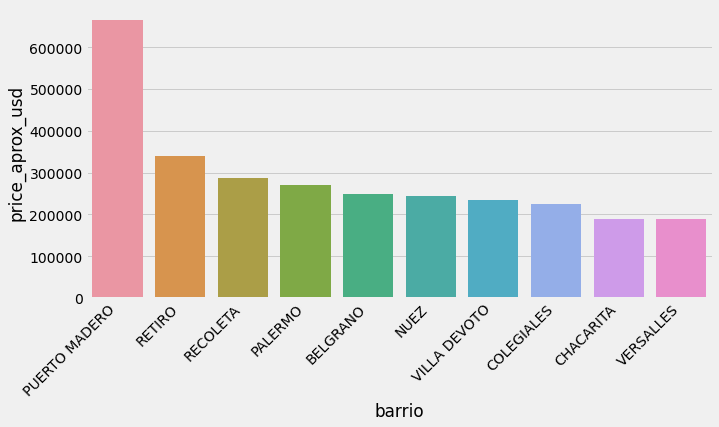

In [52]:
barrios_caros = df.groupby(['barrio'])[['price_aprox_usd']].median().reset_index().sort_values(by='price_aprox_usd', ascending=False)

plt.figure(figsize=(10,5))
plot = sns.barplot(x=barrios_caros.head(10)['barrio'], y=barrios_caros.head(10)['price_aprox_usd'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'VILLA SOLDATI'),
 Text(1, 0, 'BOCA'),
 Text(2, 0, 'CONSTITUCION'),
 Text(3, 0, 'SAN CRISTOBAL'),
 Text(4, 0, 'VILLA LUGANO'),
 Text(5, 0, 'BALVANERA'),
 Text(6, 0, 'NUEVA POMPEYA'),
 Text(7, 0, 'PATERNAL'),
 Text(8, 0, 'BOEDO'),
 Text(9, 0, 'MONSERRAT')]

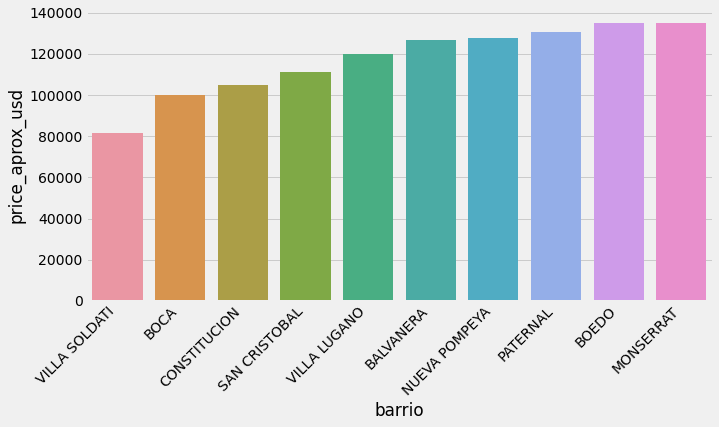

In [51]:
barrios_barato = df.groupby(['barrio'])[['price_aprox_usd']].median().reset_index().sort_values(by='price_aprox_usd', ascending=True)

plt.figure(figsize=(10,5))
plot = sns.barplot(x=barrios_caros.head(10)['barrio'], y=barrios_caros.head(10)['price_aprox_usd'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [55]:
barrios_caros.head(5)['barrio']

26    PUERTO MADERO
28           RETIRO
27         RECOLETA
20          PALERMO
4          BELGRANO
Name: barrio, dtype: object

/Users/tertola/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tertola/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

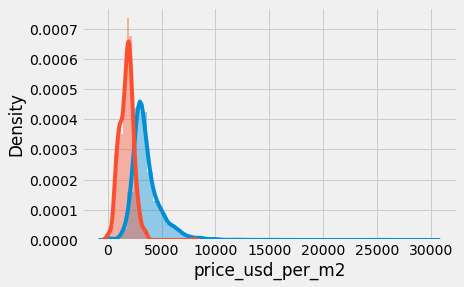

In [60]:
sns.distplot(df[df.barrio.isin(barrios_caros.head(5)['barrio'])]['price_usd_per_m2'])
sns.distplot(df[df.barrio.isin(barrios_barato.head(5)['barrio'])]['price_usd_per_m2'])

In [61]:
RMSE, MSE, MAE

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0
